In [ ]:
from mcnpy.endf.read_endf import read_endf
from mcnpy.utils import configure_endf_debug_logging
from mcnpy.cov.mf34cov_heatmap import plot_mf34_uncertainties, plot_mf34_covariance_heatmap
import logging
from mcnpy.cov.multigroup.mg_mf34_covmat import MGMF34CovMat
from mcnpy.cov.multigroup.MF34_to_MG import MF34_to_MG
from mcnpy.energy_grids import SCALE56
import pandas as pd
import numpy as np

# === DEBUG LOGGING SETUP ===
modules = [
    'mcnpy.endf.parsers.parse_mf34',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [2]:
#jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
#jendl_endf = read_endf(jendl_Fe56)

In [3]:
jeff_Fe56 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
jeff_endf = read_endf(jeff_Fe56)

cov = jeff_endf.mf[34].to_ang_covmat()

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Found MT sections: [2]
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MT2 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing subsection 1/1 with MAT1=0, MT1=2, NL=6, NL1=6
[DEBUG] mcnpy.endf.parsers.parse_mf34: Processing 21 sub-subsections for this subsection
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing sub-subsection 1/21 with L=1, L1=1, LCT=0, NI=3
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing LIST record 1/3 with LS=1, LB=5, NT=66, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 processing: LS=1, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 symmetric matrix: 10x10, upper triangle = 55 elements
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 total values to read: 11 (energies) + 55 (matrix) = 66
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 read 66 total values
[DEBUG

In [4]:
jeff_endf.mf[4].mt[2].get_interpolation_summary()

'Mixed Representation (LTT=3) Interpolation Summary:\n============================================================\n\nLegendre Coefficients Section:\n-----------------------------------\n  Energy range: 1.000e-05 to 4.500e+07 eV\n  Interpolation: linear-linear\n\nTabulated Distributions Section:\n-----------------------------------\n  Energy range: 4.500e+07 to 1.500e+08 eV\n  Interpolation: linear-linear\n\nAngular Interpolation Schemes:\n------------------------------\n  Angular distributions use:\n    - linear-linear'

In [5]:
cov.summary()

,isotope_row,MT_row,L_row,isotope_col,MT_col,L_col,NE,is_relative,frame
0,26056,2,1,26056,2,1,43,True,same-as-MF4
1,26056,2,1,26056,2,2,16,True,same-as-MF4
2,26056,2,1,26056,2,3,16,True,same-as-MF4
3,26056,2,1,26056,2,4,16,True,same-as-MF4
4,26056,2,1,26056,2,5,13,True,same-as-MF4
5,26056,2,1,26056,2,6,13,True,same-as-MF4
6,26056,2,2,26056,2,2,43,True,same-as-MF4
7,26056,2,2,26056,2,3,16,True,same-as-MF4
8,26056,2,2,26056,2,4,16,True,same-as-MF4
9,26056,2,2,26056,2,5,13,True,same-as-MF4


In [6]:
print(cov.describe(1))

Matrix 1:
  Reaction: 26056 MT2 (L=1) ↔ 26056 MT2 (L=2)
  Shape: (15, 15), Energy grid: 16 points (15 intervals)
  Type: Relative
  Reference frame: same-as-MF4


In [7]:
cov.to_dataframe()   

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [8]:
#cov = jendl_endf.mf[34].to_ang_covmat()

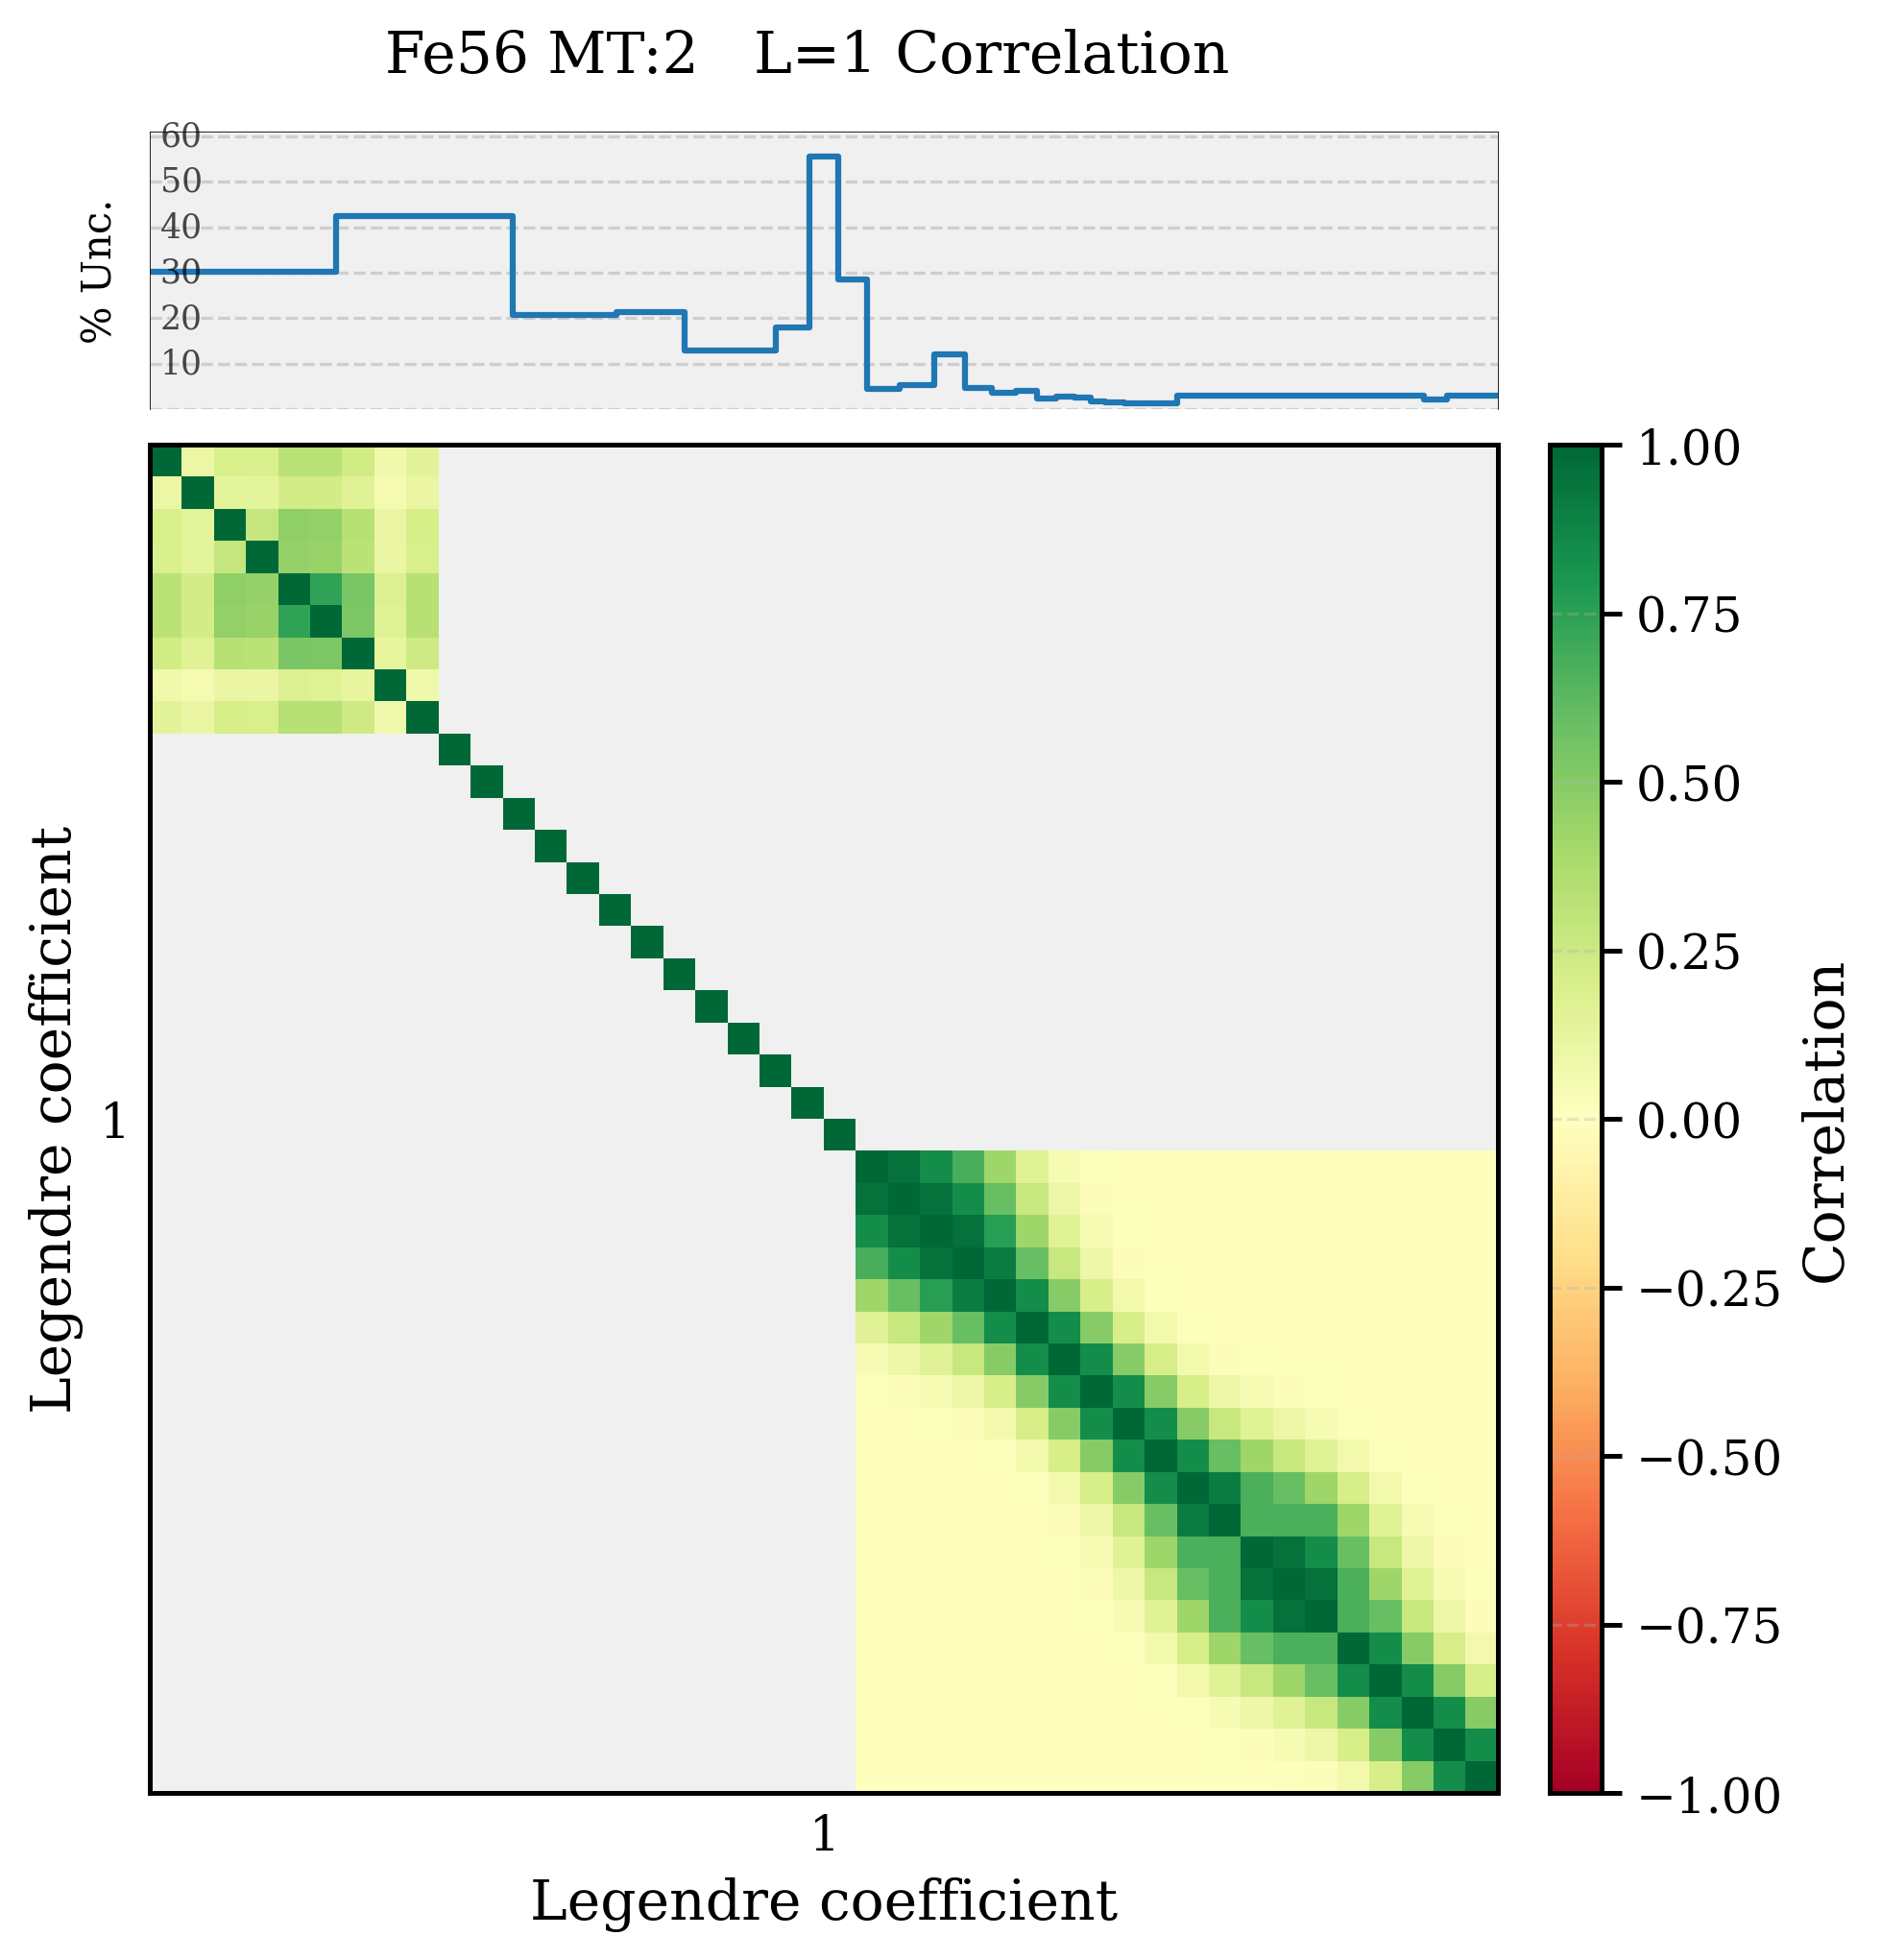

In [9]:
cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    matrix_type="corr",
    show_uncertainties=True
);


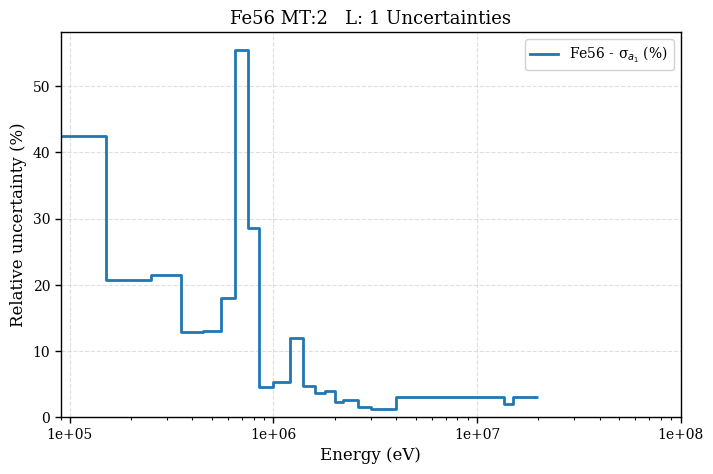

In [10]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    energy_range=(9e4, 1e8),
);


In [17]:
jeff_endf.mf[4].mt[2].extract_legendre_coefficients(SCALE56)

{0: array([ 0.00000000e+00,  5.87772333e-05,  5.87778699e-05,  5.87794933e-05,
         5.87810530e-05,  5.87821140e-05,  5.87831750e-05,  5.87852970e-05,
         5.87874190e-05,  5.87927241e-05,  5.87980291e-05,  5.88033341e-05,
         5.88112917e-05,  5.88139442e-05,  5.88165968e-05,  5.88245543e-05,
         5.88431220e-05,  5.88839708e-05,  5.88913978e-05,  5.88967029e-05,
         5.93073131e-05,  5.94399392e-05,  5.94664644e-05,  5.95062522e-05,
         5.95195148e-05,  6.09518761e-05,  6.10261467e-05,  6.10845022e-05,
         6.25964391e-05,  6.27163331e-05,  6.56733634e-05,  6.59386155e-05,
         6.95142138e-05,  6.99173970e-05,  7.10845062e-05,  7.12436574e-05,
         7.86919363e-05,  7.90951195e-05,  2.97503695e-04,  4.55593944e-04,
         3.16021800e-03,  3.92100500e-03,  1.73179866e-02,  1.04946518e-01,
         1.38907846e-01,  9.11946934e-02, -8.38732119e-03,  4.61383353e-01,
         1.61540500e-01,  1.73340780e-01, -1.03022800e-01,  1.49678100e-01,
         

In [12]:
SCALE56 = [e * 1e6 for e in SCALE56]

In [13]:
mg_cov = MF34_to_MG(
        endf_object=jeff_endf,
        energy_grid=SCALE56,
        weighting_function="constant",
        isotope=26056,  
        mt=2           
    )

In [14]:
mg_cov.energy_grid

array([1.000e-05, 4.000e-03, 1.000e-02, 2.530e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 8.000e-02, 1.000e-01, 1.500e-01, 2.000e-01, 2.500e-01,
       3.250e-01, 3.500e-01, 3.750e-01, 4.500e-01, 6.250e-01, 1.010e+00,
       1.080e+00, 1.130e+00, 5.000e+00, 6.250e+00, 6.500e+00, 6.875e+00,
       7.000e+00, 2.050e+01, 2.120e+01, 2.175e+01, 3.600e+01, 3.713e+01,
       6.500e+01, 6.750e+01, 1.012e+02, 1.050e+02, 1.160e+02, 1.175e+02,
       1.877e+02, 1.915e+02, 2.250e+03, 3.740e+03, 1.700e+04, 2.000e+04,
       5.000e+04, 2.000e+05, 2.700e+05, 3.300e+05, 4.700e+05, 6.000e+05,
       7.500e+05, 8.611e+05, 1.200e+06, 1.500e+06, 1.850e+06, 3.000e+06,
       4.304e+06, 6.434e+06, 2.000e+07])

In [15]:
mg_cov.legendre_coefficients

{(26056,
  2,
  1): array([-2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04, -2.13329110e-04, -2.13329110e-04,
        -2.13329110e-04, -2.13329110e-04,  1.05682007e-02,  2.13025778e-02,
         3.20673308e-02,  8.76103065e-03,  7.56604048e-02,  1.68585791e-01,
         1.33982982e-01,  1.61554901e-01,  2.25414916e-01,  2.7521573

ValueError: Axis limits cannot be NaN or Inf

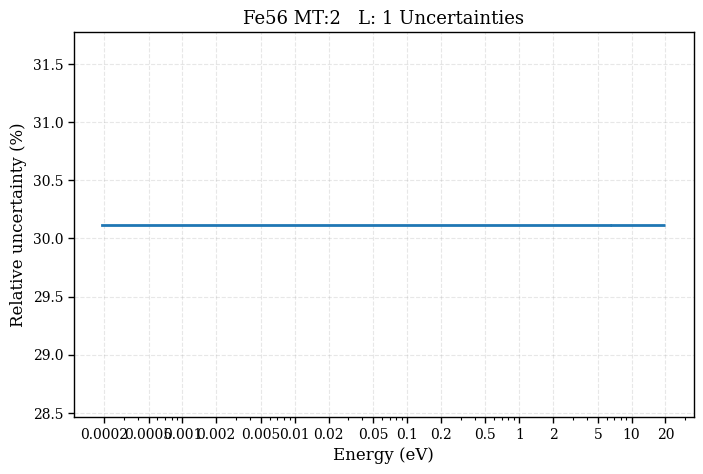

In [17]:
mg_cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
)


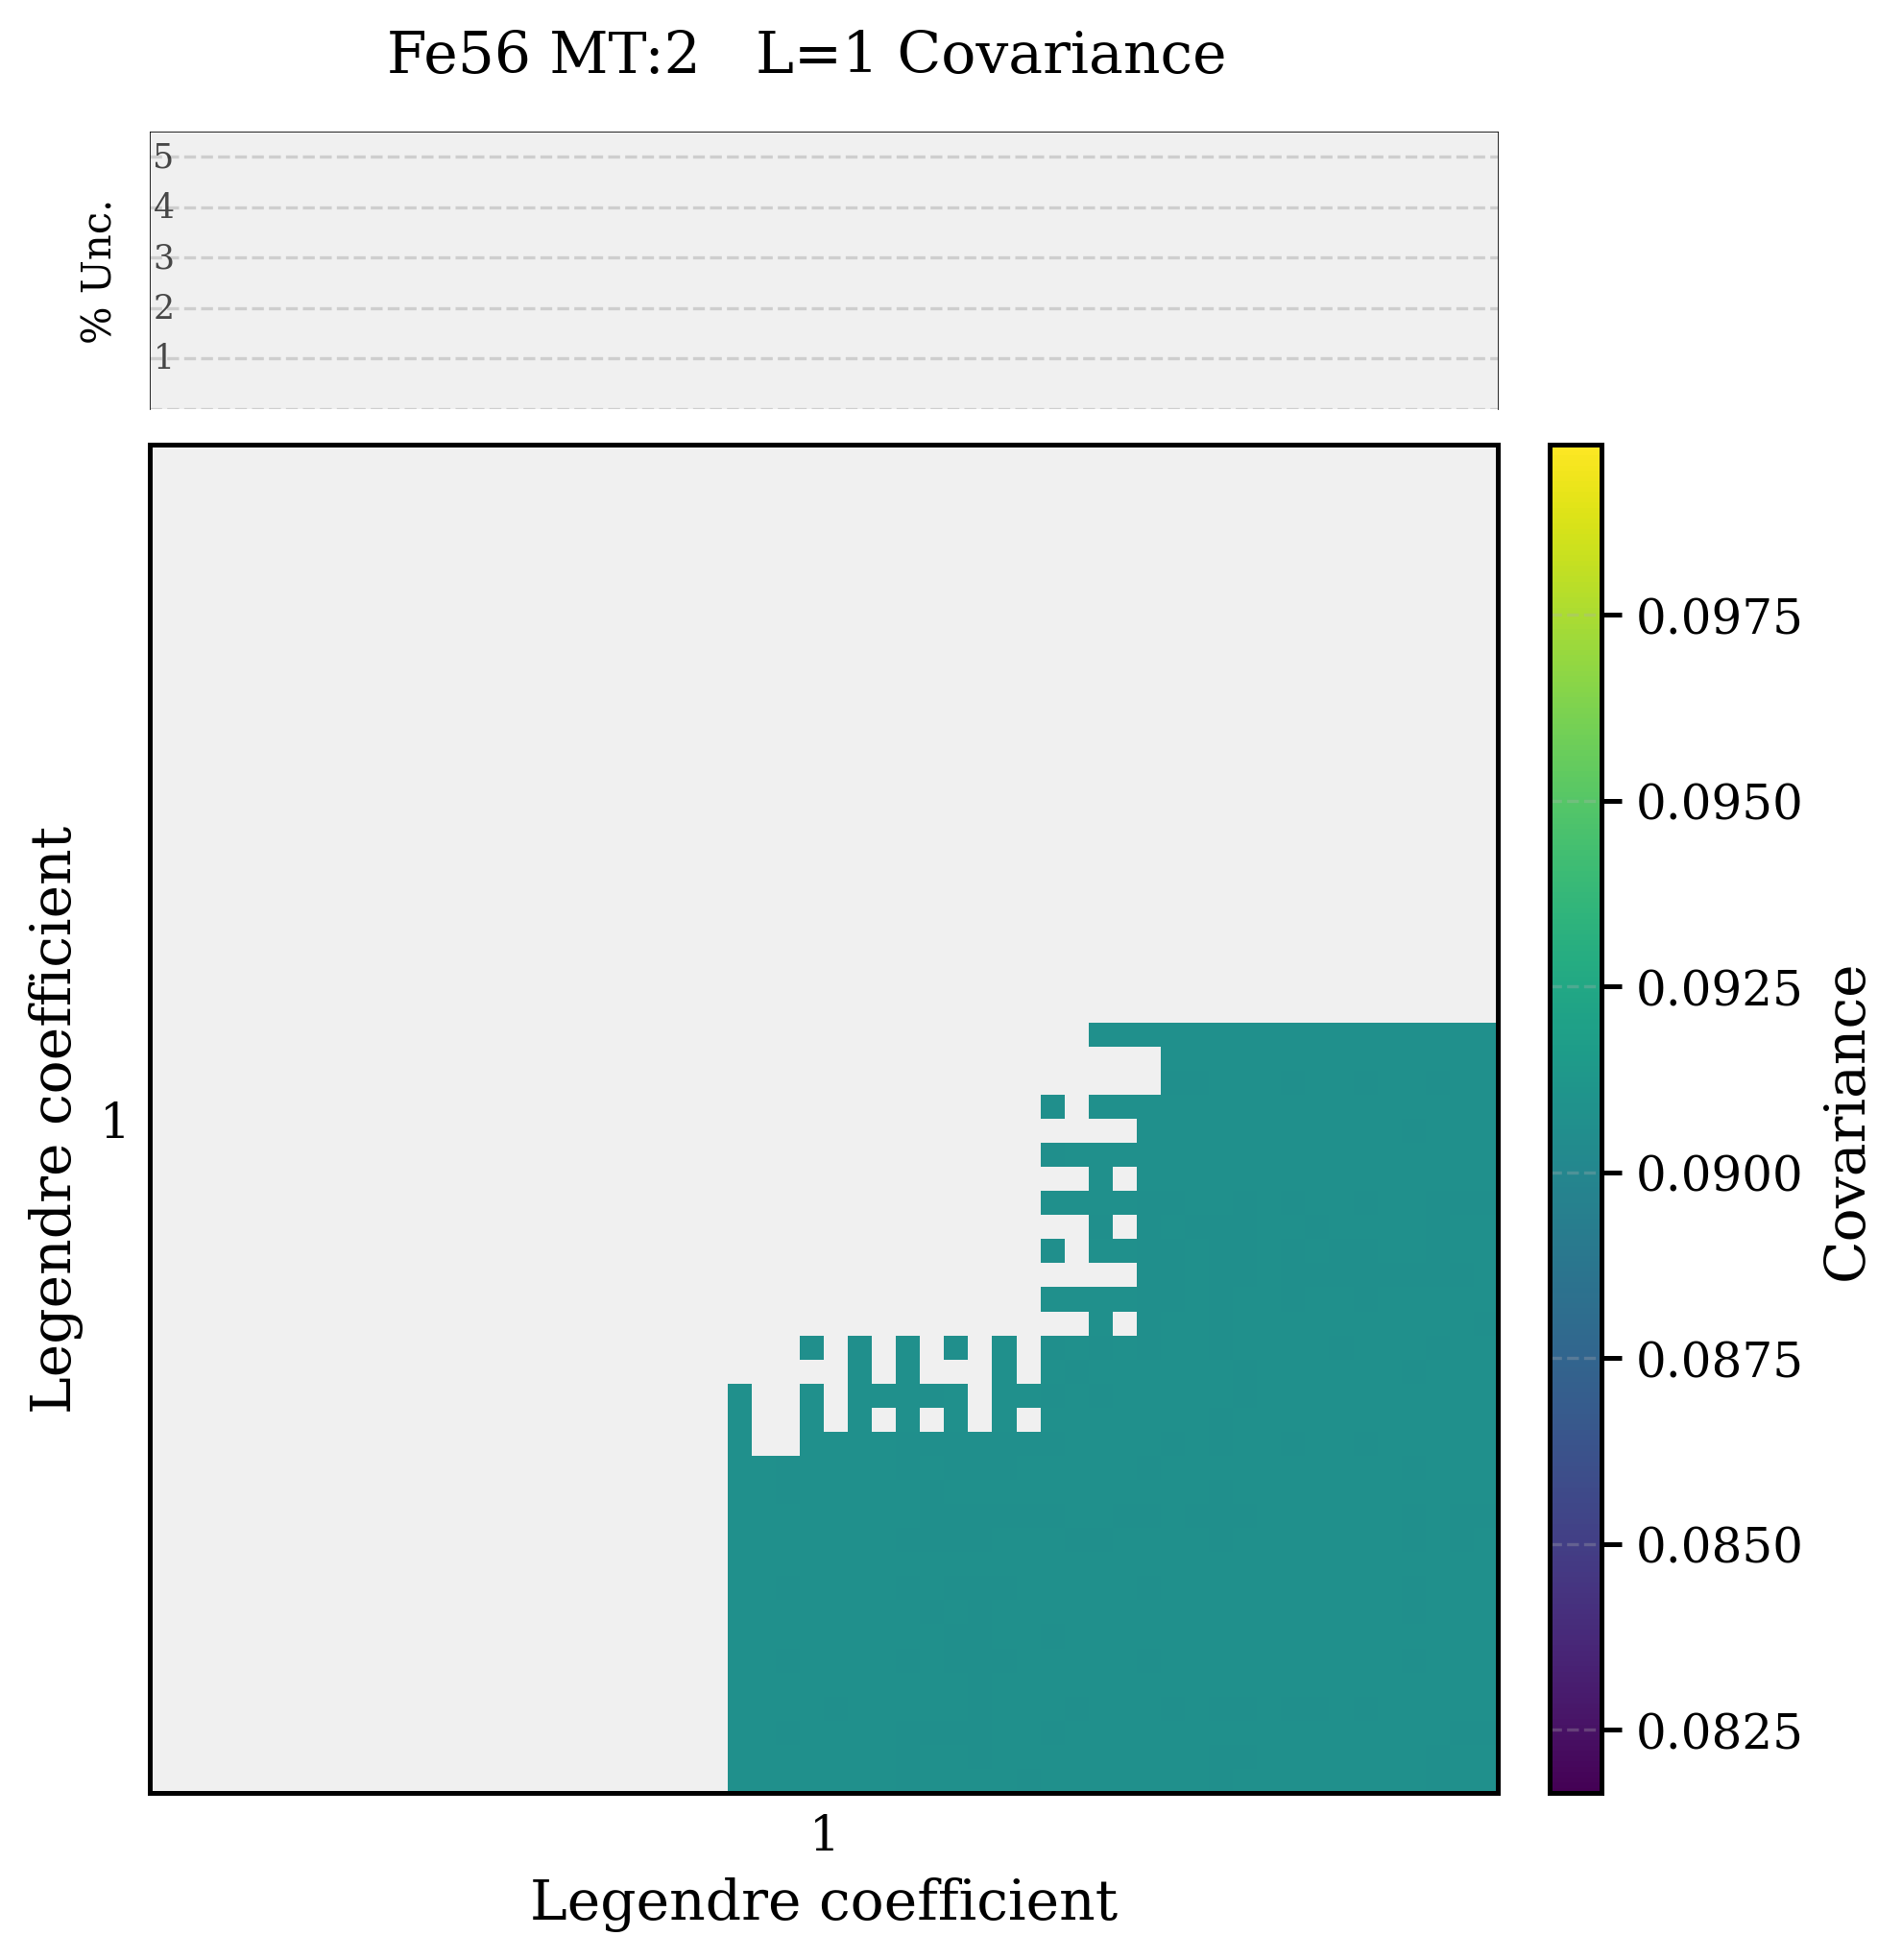

In [27]:
mg_cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    matrix_type="cov",
    show_uncertainties=True
)

In [ ]:
mg_cov.to_dataframe()

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,26056,2,1,26056,2,2,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,26056,2,1,26056,2,3,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,26056,2,1,26056,2,4,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,26056,2,1,26056,2,5,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
5,26056,2,1,26056,2,6,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
6,26056,2,2,26056,2,2,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
7,26056,2,2,26056,2,3,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
8,26056,2,2,26056,2,4,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
9,26056,2,2,26056,2,5,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


In [15]:
import numpy as np

# Examine the results in detail
print("Detailed examination of multigroup results:")
print(f"Energy group edges: {mg_cov.energy_group_edges}")
print(f"Number of groups: {mg_cov.num_groups}")

# Look at the first matrix (L=1, L=1 diagonal block)
print(f"\nFirst matrix shape: {mg_cov.relative_matrices[0].shape}")
print(f"Relative matrix (L=1, L=1):")
print(mg_cov.relative_matrices[0])

print(f"\nCorresponding MG means for L=1:")
print(f"Row means: {mg_cov.mg_means_row[0]}")
print(f"Col means: {mg_cov.mg_means_col[0]}")

print(f"\nAbsolute matrix (L=1, L=1):")
print(mg_cov.absolute_matrices[0])

# Check for non-zero values
relative_non_zero = np.any(~np.isnan(mg_cov.relative_matrices[0]))
absolute_non_zero = np.any(mg_cov.absolute_matrices[0] != 0)
print(f"\nRelative matrix has non-NaN values: {relative_non_zero}")
print(f"Absolute matrix has non-zero values: {absolute_non_zero}")

# Test some specific values
print(f"\nDiagonal of relative matrix: {np.diag(mg_cov.relative_matrices[0])}")
print(f"Diagonal of absolute matrix: {np.diag(mg_cov.absolute_matrices[0])}")

# Test performance with a larger grid
print(f"\n\nTesting with VITAMINJ174 grid (174 groups)...")
import time
start_time = time.time()

try:
    mg_cov_full = MF34_to_MG(
        endf_object=jeff_endf,
        energy_grid="VITAMINJ174",
        weighting_function="constant",
        isotope=26056,
        mt=2,
        max_legendre_order=6  # Limit to avoid too much computation
    )
    end_time = time.time()
    print(f"Full grid conversion successful in {end_time - start_time:.2f} seconds")
    print(f"Result: {mg_cov_full.num_groups} groups, {mg_cov_full.num_matrices} matrices")
except Exception as e:
    end_time = time.time()
    print(f"Error with full grid after {end_time - start_time:.2f} seconds: {e}")

Detailed examination of multigroup results:
Energy group edges: [1.000e-11 4.000e-09 1.000e-08 2.530e-08 4.000e-08 5.000e-08 6.000e-08
 8.000e-08 1.000e-07 1.500e-07 2.000e-07 2.500e-07 3.250e-07 3.500e-07
 3.750e-07 4.500e-07 6.250e-07 1.010e-06 1.080e-06 1.130e-06 5.000e-06
 6.250e-06 6.500e-06 6.875e-06 7.000e-06 2.050e-05 2.120e-05 2.175e-05
 3.600e-05 3.713e-05 6.500e-05 6.750e-05 1.012e-04 1.050e-04 1.160e-04
 1.175e-04 1.877e-04 1.915e-04 2.250e-03 3.740e-03 1.700e-02 2.000e-02
 5.000e-02 2.000e-01 2.700e-01 3.300e-01 4.700e-01 6.000e-01 7.500e-01
 8.611e-01 1.200e+00 1.500e+00 1.850e+00 3.000e+00 4.304e+00 6.434e+00
 2.000e+01]
Number of groups: 56

First matrix shape: (56, 56)
Relative matrix (L=1, L=1):
[[    nan     nan     nan ...     nan     nan     nan]
 [    nan     nan     nan ...     nan     nan     nan]
 [    nan     nan     nan ...     nan     nan     nan]
 ...
 [    nan     nan     nan ... 0.09072 0.09072 0.09072]
 [    nan     nan     nan ... 0.09072 0.09072 0.0907